# Experimenting with derivative calculations
The output from EQ3 generates noise due to its precision.

In [1]:
import numpy as np
from thermoengine import phases
from thermoengine import model
import pyQ3
import dill
#%run core.ipynb
import importlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


## Create the DEWFluid phase object
This imports the manually created coder python module. This is not a coder produced module, but ENKI will treat it as though it is.

In [2]:
DEWFluid = phases.SolutionPhase('DEWFluid_', 'DEW', calib=False, source='coder',coder_module='DEWFluid_module')

Module generated by the coder package does not yet provide a formula method.
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.


The system properties are currently hard-coded into the module, the system is set up with the elements:

In [3]:
elements = ['O', 'H', 'Si', 'Na', 'Cl']
basis_species = ['H2O', 'H+', 'O2(G)', 'H4SIO4(AQ)', 'NA+', 'CL-']
other_species = ['H6SI2O7(AQ)', 'H8SI3O10(AQ)', 'H3SIO4-', 'OH-', 'O2(AQ)', 'NACL(AQ)']
# elements = pyQ3.defaultsystem.elements
# basis_species = pyQ3.defaultsystem.basis_species_names
# other_species = pyQ3.defaultsystem.other_species_names
sys = pyQ3.System(elements=elements, basis_species=basis_species, other_species=other_species)
sys.elements

['O', 'H', 'Si', 'Na', 'Cl']

In [49]:
def dgdn(t, p, n, i, dn=1e-6, pts=9):
    g = np.zeros([pts])
    mols = np.zeros([np.shape(n)[0], pts])
    for j in range(pts):
        mols[:, j] = n
        mols[i, j] = n[i] + (j - pts//2)*dn
        g[j] = DEWFluid.gibbs_energy(t, p, mol=mols[:,j])
    
    return g, mols

In [50]:
moles = np.array([0.3 + 0.04, 
                  0.6 + 0.04, 
                  0.01,
                  0.01,
                  0.01
                 ])

In [51]:
g4, n4 = dgdn(723.15, 10000.0, moles, 1, dn=1e-4, pts=21)
g5, n5 = dgdn(723.15, 10000.0, moles, 1, dn=1e-5, pts=21)
g6, n6 = dgdn(723.15, 10000.0, moles, 1, dn=1e-6, pts=21)

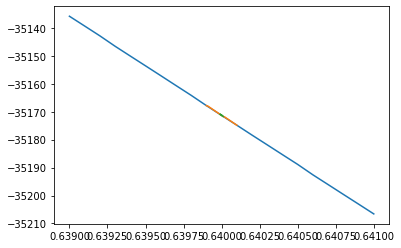

In [52]:
f, a = plt.subplots()
a.plot(n4[1], g4)
a.plot(n5[1], g5)
a.plot(n6[1], g6)
plt.show()